In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/sample_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/sample_data/test.csv
/content/sample_data/gender_submission.csv
/content/sample_data/train.csv


In [ ]:
test_data = pd.read_csv('/content/sample_data/test.csv')
print('The original database shape:', test_data.shape) 
test_data.head()

The original database shape: (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_data = pd.read_csv('/content/sample_data/train.csv')
print('The original database shape:', train_data.shape) 
train_data.head()

The original database shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print('The original database shape:', train_data.shape, '\n', train_data.dtypes) 

# отбор числовых колонок
df_numeric = train_data.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print('Numeric cols:',numeric_cols)

# отбор нечисловых колонок
df_non_numeric = train_data.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print('Non numeric cols:',non_numeric_cols)

The original database shape: (891, 12) 
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Numeric cols: ['PassengerId' 'Survived' 'Pclass' 'Age' 'SibSp' 'Parch' 'Fare']
Non numeric cols: ['Name' 'Sex' 'Ticket' 'Cabin' 'Embarked']


**Из данных таблицы важными являются характеристики человека и кабина, так как от ее расположения может зависеть результат, остальное удаляем.**

In [ ]:
cols_to_drop = ['Name', 'Ticket', 'Embarked', 'Fare']
train_data = train_data.drop(cols_to_drop, axis=1)
test_data = test_data.drop(cols_to_drop, axis=1)
print(train_data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Cabin           object
dtype: object


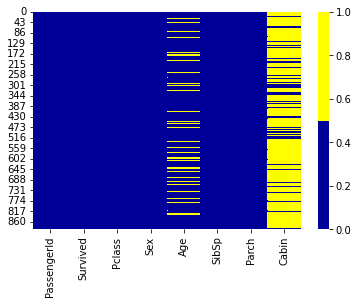

In [ ]:
import seaborn as sns
cols = train_data.columns[:22] 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(train_data[cols].isnull(), cmap=sns.color_palette(colours))

**Из тепловой карты видно, что столбец Cabin имеет высокий процент пропусков, его можно удалить.**

In [ ]:
cols_to_drop = ['Cabin']
train_data = train_data.drop(cols_to_drop, axis=1)
test_data = test_data.drop(cols_to_drop, axis=1)

**Заполняю пропуски Age медианой:**

In [ ]:
# impute the missing values and create the missing value indicator variables for each numeric column.
data_numeric = train_data.select_dtypes(include=[np.number])
numeric_cols = data_numeric.columns.values

for col in numeric_cols:
    missing = train_data[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        med = train_data[col].median()
        train_data[col] = train_data[col].fillna(med)
        
data_numeric = test_data.select_dtypes(include=[np.number])
numeric_cols = data_numeric.columns.values

for col in numeric_cols:
    missing = test_data[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        med = test_data[col].median()
        test_data[col] = test_data[col].fillna(med)

imputing missing values for: Age


In [ ]:
for col in train_data.columns:
    pct_missing = np.mean(train_data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

PassengerId - 0%
Survived - 0%
Pclass - 0%
Sex - 0%
Age - 0%
SibSp - 0%
Parch - 0%


Теперь процент пропущенных значений по нулям.

In [ ]:
print(train_data.dtypes)
train_data.nunique()

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
dtype: object


PassengerId    891
Survived         2
Pclass           3
Sex              2
Age             88
SibSp            7
Parch            7
dtype: int64

**Из категориальных данных только столбец Sex, уникальных значений в нем два, поэтому кодирую его метками:**

In [ ]:
train_data["Sex"] = train_data["Sex"].astype('category')
train_data["Sex"] = train_data["Sex"].cat.codes
test_data["Sex"] = test_data["Sex"].astype('category')
test_data["Sex"] = test_data["Sex"].cat.codes
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.0,1,0
1,2,1,1,0,38.0,1,0
2,3,1,3,0,26.0,0,0
3,4,1,1,0,35.0,1,0
4,5,0,3,1,35.0,0,0


Нормализую данные:

In [ ]:
# Feature scaling with StandardScaler 
from sklearn.preprocessing import StandardScaler 
scale_features_std = StandardScaler() 
features_train = scale_features_std.fit_transform(train_data) 
print(features_train)

[[-1.41421356 -1.22474487  0.81649658 -1.50516598  0.81649658  0.
  -1.22474487]
 [-0.70710678  0.81649658 -1.22474487  1.11251398  0.81649658  0.
   0.81649658]
 [ 0.          0.81649658  0.81649658 -0.85074599 -1.22474487  0.
   0.81649658]
 [ 0.70710678  0.81649658 -1.22474487  0.62169899  0.81649658  0.
   0.81649658]
 [ 1.41421356 -1.22474487  0.81649658  0.62169899 -1.22474487  0.
  -1.22474487]]


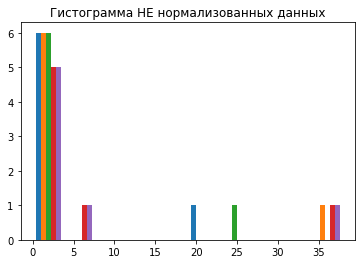

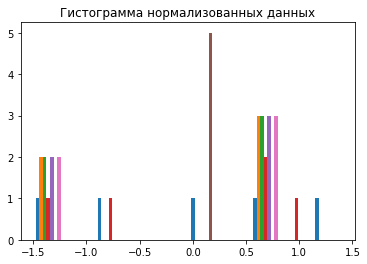

In [ ]:
plt.hist(train_data) 
plt.title("Гистограмма НЕ нормализованных данных") 
plt.show()
plt.hist(features_train) 
plt.title("Гистограмма нормализованных данных") 
plt.show()

**Обучаю модель:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]


features = ["Pclass", "Age", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

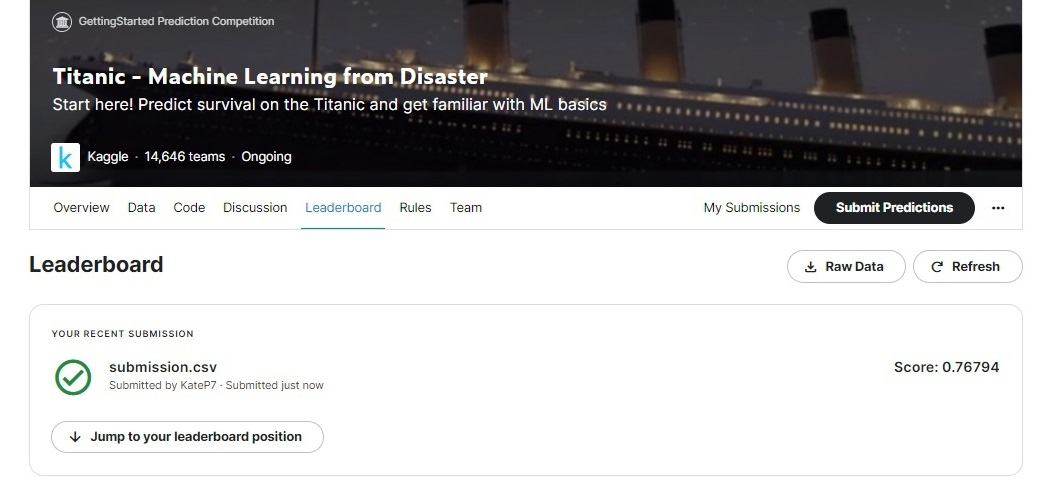

Результат: 0,76794